# Задание лабораторной работы

- Выбрать набор данных (датасет) для решения задачи классификации или регрессии.
- С использованием метода train_test_split разделить выборку на обучающую и тестовую.
- Обучить модель ближайших соседей для произвольно заданного гиперпараметра K. Оценить качество модели с помощью подходящих для задачи метрик.
- Произвести подбор гиперпараметра K с использованием GridSearchCV и/или RandomizedSearchCV и кросс-валидации, оценить качество оптимальной модели. Желательно использование нескольких стратегий кросс-валидации.
- Сравнить метрики качества исходной и оптимальной моделей.

## Выбор и загрузка данных

В качестве датасета будем использовать набор данных, содержащий данные различных химических элементов

Набор данных имеет следующие атрибуты:

- RI - Refractive Index - коэффициент преломления
- Na - Sodium - Содержание натрия (массовый процент в соответствующем оксиде)
- Mg - Magnesium - Содержание магния
- Al - Aluminum - Содержание алюминия
- Si - Silicon - Содержание кремния
- K -  Potassium - Содержание калия
- Ca - Calcium - Содержание кальция
- Ba - Barium - Содеражние бария
- Fe - Iron - Содержание железа
- Type - Type of glass - тип стекла (1, 2 - стекла для зданий, 3, 4 - стекла для автомобилей, 5 - стеклотара, 6 - tableware - бытовые стекла, 7 - стекла для ламп; 4 отсутствует в данном наборе данных)

### Импорт библиотек

Импортируем библиотеки с помощью команды import:

In [32]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")

### Загрузка данных

Загрузим набор данных:

In [33]:
data = pd.read_csv('glass.csv')

## Первичный анализ и обрабока данных

Выведем первые 5 строк датасета:

In [34]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Определим размер датасета и целевого признака (Type):

In [35]:
data.shape, data.Type.shape

((214, 10), (214,))

### Разделение данных

Разделим данные на столбец с целевым признаком и данные с другими столбцами:

In [36]:
X = data.drop("Type", axis=1)
y = data["Type"]

In [37]:
print(X.head(), "\n")
print(y.head())

        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0 

0    1
1    1
2    1
3    1
4    1
Name: Type, dtype: int64


In [38]:
print(X.shape)
print(y.shape)

(214, 9)
(214,)


### Разделение выборки на обучающую и тестовую

Будем решать задачу классификации - отношения записи к определенному типу стекла.

Разделим выборку с помощью функции train_test_split:

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

Размеры обучающей выборки и тестовой выборки:

In [41]:
X_train.shape, y_train.shape

((160, 9), (160,))

In [42]:
X_test.shape, y_test.shape

((54, 9), (54,))

В выборках остались все типы стекол, доступные в изначальном датасете (4 отсутствует в исходном):

In [43]:
np.unique(y_train)

array([1, 2, 3, 5, 6, 7])

In [44]:
np.unique(y_test)

array([1, 2, 3, 5, 6, 7])

Проверим распределение типов:

In [45]:
from typing import Dict, Tuple

In [46]:
def type_proportions(array: np.ndarray) -> Dict[int, Tuple[int, float]]:
    labels, counts = np.unique(array, return_counts=True)
    counts_perc = counts/array.size
    res = dict()
    for label, count2 in zip(labels, zip(counts, counts_perc)):
        res[label] = count2
    return res

def print_type_proportions(array: np.ndarray):
    proportions = type_proportions(array)
    if len(proportions)>0:
        print('Тип \t Количество \t Процент встречаемости')
    for i in proportions:
        val, val_perc = proportions[i]
        val_perc_100 = round(val_perc * 100, 2)
        print('{} \t {} \t \t {}%'.format(i, val, val_perc_100))

In [47]:
print_type_proportions(data.Type)

Тип 	 Количество 	 Процент встречаемости
1 	 70 	 	 32.71%
2 	 76 	 	 35.51%
3 	 17 	 	 7.94%
5 	 13 	 	 6.07%
6 	 9 	 	 4.21%
7 	 29 	 	 13.55%


In [48]:
print_type_proportions(y_train)

Тип 	 Количество 	 Процент встречаемости
1 	 47 	 	 29.38%
2 	 60 	 	 37.5%
3 	 10 	 	 6.25%
5 	 12 	 	 7.5%
6 	 8 	 	 5.0%
7 	 23 	 	 14.37%


In [49]:
print_type_proportions(y_test)

Тип 	 Количество 	 Процент встречаемости
1 	 23 	 	 42.59%
2 	 16 	 	 29.63%
3 	 7 	 	 12.96%
5 	 1 	 	 1.85%
6 	 1 	 	 1.85%
7 	 6 	 	 11.11%


Видим, что пропорции типов стекол приблизительно сохранились.

## Построение модели ближайших соседей для произвольного гиперпараметра

Пусть гиперпараметр будет равен 20, построим модель:

In [50]:
from sklearn.neighbors import KNeighborsClassifier

In [51]:
clf_i = KNeighborsClassifier(n_neighbors=20)
clf_i.fit(X_train, y_train)
target_i = clf_i.predict(X_test)
len(target_i), target_i

(54,
 array([5, 7, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
        2, 1, 2, 1, 2, 2, 2, 1, 5, 7, 1, 1, 1, 1, 2, 2, 5, 1, 1, 7, 7, 1,
        7, 1, 2, 1, 2, 7, 1, 2, 1, 2]))

Эту модель будем считать исходной.

## Кросс-валидация и подбор гиперпараметра K через GridSearch и RandomizedSearch 

### Кросс-валидация

In [52]:
from sklearn.model_selection import cross_val_score, cross_validate

In [53]:
scores = cross_val_score(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, cv=3)
scores

array([0.91666667, 0.95774648, 0.95774648])

С помощью функции cross_validate:

In [54]:
scoring = {'precision': 'precision_weighted', 
           'recall': 'recall_weighted',
           'f1': 'f1_weighted'}
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                        data, data.Type, scoring='f1_weighted', 
                        cv=3, return_train_score=True)
scores

{'fit_time': array([0.00898075, 0.00823617, 0.01349163]),
 'score_time': array([0.11983967, 0.03248072, 0.02643132]),
 'test_score': array([0.91673789, 0.95774648, 0.95301901]),
 'train_score': array([0.9930479 , 0.98664493, 0.97930491])}

#### Стратегия K-Fold

In [55]:
from sklearn.model_selection import KFold

In [56]:
kf = KFold(n_splits=5)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.027987  , 0.01700735, 0.00674582, 0.00575733, 0.00625443]),
 'score_time': array([0.04608321, 0.02732158, 0.02304912, 0.01953483, 0.01906013]),
 'test_score': array([1.        , 1.        , 0.925     , 0.46055632, 0.01858304])}

#### Стратегия Repeated K-Fold

In [57]:
from sklearn.model_selection import RepeatedKFold

In [58]:
kf = RepeatedKFold(n_splits=3, n_repeats=2)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.01520181, 0.01555824, 0.00670791, 0.00630975, 0.00595236,
        0.0053575 ]),
 'score_time': array([0.05896068, 0.03042698, 0.02766943, 0.02568245, 0.02405   ,
        0.02369523]),
 'test_score': array([0.91868687, 0.921645  , 0.9753291 , 0.94521605, 0.9370968 ,
        0.94510593])}

#### Стратегия Leave One Out

In [59]:
from sklearn.model_selection import LeaveOneOut

In [60]:
kf = LeaveOneOut()
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.03578186, 0.00669909, 0.00630093, 0.00847292, 0.00541091,
        0.00532031, 0.00535321, 0.0053606 , 0.00645089, 0.00645471,
        0.00560808, 0.00559449, 0.00556874, 0.0063405 , 0.00557494,
        0.00637984, 0.00634527, 0.00568652, 0.0059824 , 0.00544405,
        0.00557852, 0.00591636, 0.00551319, 0.00524998, 0.00543141,
        0.0053091 , 0.0064292 , 0.00570416, 0.00578713, 0.00598073,
        0.00619864, 0.00544357, 0.00555754, 0.00515294, 0.00535226,
        0.00539136, 0.0060091 , 0.00648236, 0.00594258, 0.00555158,
        0.0055337 , 0.00560069, 0.00593519, 0.00555706, 0.00617051,
        0.00564647, 0.00556397, 0.00515246, 0.00535464, 0.00794601,
        0.00599265, 0.01188445, 0.01548982, 0.00865102, 0.00695634,
        0.00681329, 0.00855613, 0.00564146, 0.00615883, 0.00534225,
        0.00602245, 0.00539374, 0.00590348, 0.00623226, 0.00557613,
        0.00525212, 0.0055387 , 0.00553679, 0.00586033, 0.00601745,
        0.00611854, 0.00591016, 0.00

#### Стратегия Leave P Out

In [61]:
from sklearn.model_selection import LeavePOut

In [62]:
# kf = LeavePOut(2)
# scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
#                          data, data.Type, scoring='f1_weighted', 
#                          cv=kf)
# scores

#### Стратегия ShuffleSplit

In [63]:
from sklearn.model_selection import ShuffleSplit

In [64]:
kf = ShuffleSplit(n_splits=5, test_size=0.25)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, scoring='f1_weighted', 
                         cv=kf)
scores

{'fit_time': array([0.0304687 , 0.01977015, 0.00665188, 0.00678587, 0.00685263]),
 'score_time': array([0.11784983, 0.05756354, 0.02650261, 0.05814195, 0.05111051]),
 'test_score': array([0.93129175, 0.9260101 , 0.94203458, 0.94372042, 0.92688793])}

#### Стратегия StratifiedKFold

In [65]:
from sklearn.model_selection import StratifiedKFold

In [66]:
skf = StratifiedKFold(n_splits=3)
scores = cross_validate(KNeighborsClassifier(n_neighbors=2), 
                         data, data.Type, scoring='f1_weighted', 
                         cv=skf)
scores

{'fit_time': array([0.05290556, 0.0070343 , 0.0111239 ]),
 'score_time': array([0.04629564, 0.04837513, 0.03204274]),
 'test_score': array([0.91673789, 0.95774648, 0.95301901])}

### Оптимизация гиперпараметра

#### Через GridSearch

In [67]:
from sklearn.model_selection import GridSearchCV

In [68]:
n_range = np.array(range(5,55,5))
tuned_parameters = [{'n_neighbors': n_range}]
tuned_parameters

[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}]

In [69]:
%%time
clf_gs = GridSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_gs.fit(X_train, y_train)

CPU times: user 1.08 s, sys: 24.9 ms, total: 1.11 s
Wall time: 1.56 s


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
             scoring='accuracy')

In [70]:
clf_gs.cv_results_

{'mean_fit_time': array([0.01602454, 0.00680676, 0.00638094, 0.00644617, 0.00602531,
        0.00542421, 0.00855422, 0.00935044, 0.00781431, 0.00739751]),
 'std_fit_time': array([0.00794115, 0.00201803, 0.00060378, 0.00026765, 0.0005701 ,
        0.00047883, 0.00467115, 0.00247215, 0.00095393, 0.00122635]),
 'mean_score_time': array([0.04142332, 0.01461782, 0.01652579, 0.0158391 , 0.01505909,
        0.01499996, 0.0281466 , 0.02175245, 0.01917605, 0.02048759]),
 'std_score_time': array([0.02281377, 0.00161594, 0.00065308, 0.00039858, 0.00106276,
        0.00095242, 0.0240761 , 0.00403233, 0.00183559, 0.00206708]),
 'param_n_neighbors': masked_array(data=[5, 10, 15, 20, 25, 30, 35, 40, 45, 50],
              mask=[False, False, False, False, False, False, False, False,
                    False, False],
        fill_value=999999),
 'params': [{'n_neighbors': 5},
  {'n_neighbors': 10},
  {'n_neighbors': 15},
  {'n_neighbors': 20},
  {'n_neighbors': 25},
  {'n_neighbors': 30},
  {'n_neigh

Лучшая модель:

In [71]:
clf_gs.best_estimator_

KNeighborsClassifier()

Лучшее значение метрики:

In [72]:
clf_gs.best_score_

0.625

Лучшее значение параметров:

In [73]:
clf_gs.best_params_

{'n_neighbors': 5}

Изменение качества на тестовой выборке в зависимости от К-соседей:

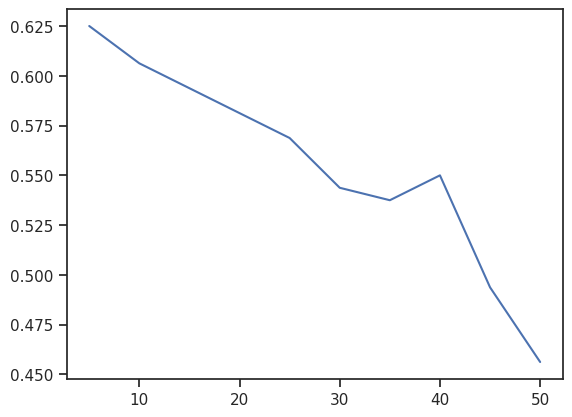

In [74]:
plt.plot(n_range, clf_gs.cv_results_['mean_test_score'])

#### Через RandomizedSearch

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [76]:
%%time
clf_rs = RandomizedSearchCV(KNeighborsClassifier(), tuned_parameters, cv=5, scoring='accuracy')
clf_rs.fit(X_train, y_train)

CPU times: user 1.17 s, sys: 5.47 ms, total: 1.17 s
Wall time: 1.78 s


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions=[{'n_neighbors': array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])}],
                   scoring='accuracy')

Оптимальные параметры:

In [77]:
clf_rs.best_score_, clf_rs.best_params_

(0.625, {'n_neighbors': 5})

Изменение качества на тестовой выборке в зависимости от К-соседей:

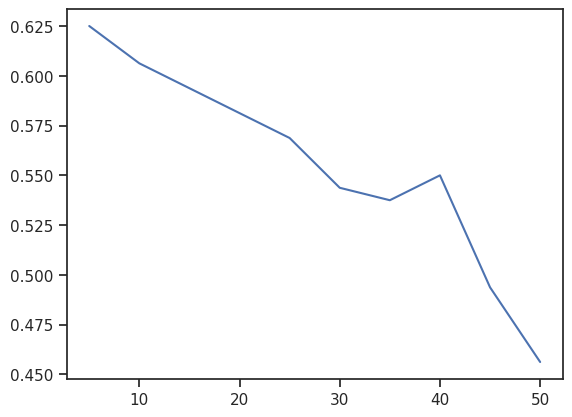

In [78]:
plt.plot(n_range, clf_rs.cv_results_['mean_test_score'])

### Построение оптимальной модели

Оптимальное число ближайших соседей = 5. Построим оптимальную модель:

In [79]:
clf_o = KNeighborsClassifier(n_neighbors=5)
clf_o.fit(X_train, y_train)
target_o = clf_o.predict(X_test)
len(target_o), target_o

(54,
 array([5, 7, 2, 2, 1, 1, 2, 1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 7,
        2, 1, 1, 1, 2, 2, 1, 1, 5, 6, 1, 1, 1, 2, 1, 1, 5, 1, 1, 7, 7, 1,
        7, 1, 1, 1, 2, 7, 2, 2, 1, 2]))

## Оценка качества исходной и оптимальной модели

### Метрика Accuracy

Она вычисляет процент (в долях) правильно определенных типов.

In [80]:
from sklearn.metrics import accuracy_score, balanced_accuracy_score

Проверим для всех типов исходной модели:

In [81]:
accuracy_score(y_test, target_i)

0.6851851851851852

И оптимальной модели:

In [82]:
accuracy_score(y_test, target_o)

0.7222222222222222

Видно, что точность оптимальной модели (5 ближайших соседей) выше, чем в исходной модели (20).

Теперь проверим для каждого конкретного типа:

In [83]:
def accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    types = np.unique(y_true)
    res = dict()
    for t in types:
        temp_data_flt = df[df['t']==t]
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        res[t] = temp_acc
    return res

def print_accuracy_score_for_types(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    accs = accuracy_score_for_types(y_true, y_pred)
    if len(accs)>0:
        print('Тип \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

Для исходной модели:

In [84]:
print_accuracy_score_for_types(y_test, target_i)

Тип 	 Accuracy
1 	 0.8260869565217391
2 	 0.6875
3 	 0.0
5 	 1.0
6 	 0.0
7 	 1.0


Видим, что процент "Accuracy" для типа 1 составляет 83%, для типа 2 - 68%, для типа 3 - 0%. Для типов 5, 6, 7 "Accuracy" составляет 100%.

Для оптимальной модели:

In [85]:
print_accuracy_score_for_types(y_test, target_o)

Тип 	 Accuracy
1 	 0.8695652173913043
2 	 0.6875
3 	 0.0
5 	 1.0
6 	 1.0
7 	 1.0


Результаты схожи, но у типа 1 метрика составляет уже 87%.

### Метрика balanced_accuracy_score

Используется для бинарной классификации. Сконвертируем данные и выведем метрику:

In [86]:
def convert_target_to_binary(array:np.ndarray, target:int) -> np.ndarray:
    res = [1 if x==target else 0 for x in array]
    return res

In [87]:
bin_y_train = convert_target_to_binary(y_train, 2)
list(zip(y_train, bin_y_train))[:10]

[(5, 0),
 (2, 1),
 (7, 0),
 (1, 0),
 (7, 0),
 (7, 0),
 (2, 1),
 (2, 1),
 (2, 1),
 (2, 1)]

In [88]:
bin_y_test = convert_target_to_binary(y_test, 2)
list(zip(y_test, bin_y_test))[:10]

[(2, 1),
 (7, 0),
 (2, 1),
 (2, 1),
 (1, 0),
 (1, 0),
 (1, 0),
 (3, 0),
 (1, 0),
 (1, 0)]

Для исходной модели:

In [89]:
bin_target_i = convert_target_to_binary(target_i, 2)

In [90]:
balanced_accuracy_score(bin_y_test, bin_target_i)

0.7516447368421053

Для оптимальной модели:

In [91]:
bin_target_o = convert_target_to_binary(target_o, 2)

In [92]:
balanced_accuracy_score(bin_y_test, bin_target_o)

0.7911184210526316

Видно, что у исходной модели метрика составляет 75%, а у оптимальной - 79%.

### Метрика "Матрица ошибок"

Создадим матрицу с помощью функции confusion_matrix:

In [93]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

Для исходной модели:

In [94]:
confusion_matrix(y_test, target_i, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 19,  4,  0,  0,  0,  0,  0],
       [ 0,  3, 11,  0,  0,  2,  0,  0],
       [ 0,  4,  3,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1],
       [ 0,  0,  0,  0,  0,  0,  0,  6]])

Визуально представим матрицу ошибок, показывающую количество верно и ошибочно классифицированных данных:

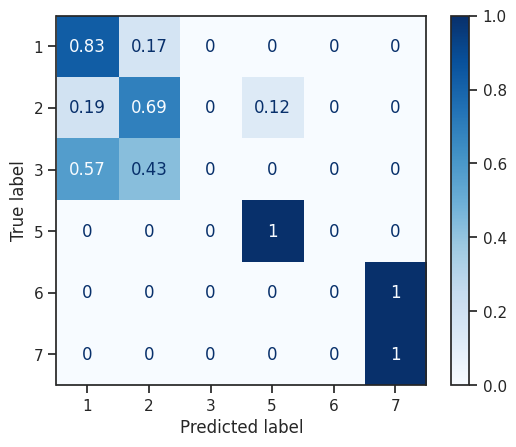

In [95]:
ConfusionMatrixDisplay.from_estimator(
        clf_i,
        X_test,
        y_test,
        display_labels=clf_i.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

Для оптимальной модели:

In [96]:
confusion_matrix(y_test, target_o, labels=[0, 1, 2, 3, 4, 5, 6, 7])

array([[ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 20,  3,  0,  0,  0,  0,  0],
       [ 0,  3, 11,  0,  0,  2,  0,  0],
       [ 0,  6,  1,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  6]])

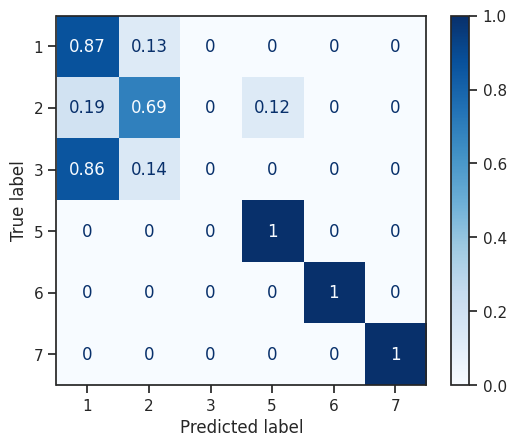

In [97]:
ConfusionMatrixDisplay.from_estimator(
        clf_o,
        X_test,
        y_test,
        display_labels=clf_o.classes_,
        cmap=plt.cm.Blues,
        normalize='true',
    )

Точность у оптимальной модели выше, чем у исходной. 

### Метрика Precision

Precision показывает долю верно предсказанных классификатором положительных объектов из всех объектов, которые классификатор верно или неверно определил как положительные.

In [98]:
from sklearn.metrics import precision_score

Для исходной модели:

In [99]:
precision_score(bin_y_test, bin_target_i)

0.6111111111111112

Для оптимальной модели:

In [100]:
precision_score(bin_y_test, bin_target_o)

0.7333333333333333

Также видна улучшенная точность у оптимальной по отношению к исходной (73% и 61%).

### Метрика Recall

Recall показывает долю верно предсказанных классификатором положительных объектов, из всех действительно положительных объектов.

In [101]:
from sklearn.metrics import recall_score

Для исходной:

In [102]:
recall_score(bin_y_test, bin_target_i)

0.6875

Для оптимальной:

In [103]:
recall_score(bin_y_test, bin_target_o)

0.6875

Точность моделей одинакова - 69%.

### Метрика F1-мера

Для объединения метрик Precision и Recall используют F-меру - среднее гармоническое от Precision и Recall. В F1 мере вес точности = 1.

In [104]:
from sklearn.metrics import f1_score

Для исходной:

In [105]:
f1_score(bin_y_test, bin_target_i)

0.6470588235294118

Для оптимальной:

In [106]:
f1_score(bin_y_test, bin_target_o)

0.7096774193548387

Точность оптимальной модели выше.

### Вывод метрик через classification_report

Функция classification_report позволяет выводить значения точности, полноты и F-меры для всех классов выборки:

In [107]:
from sklearn.metrics import classification_report

Для исходной:

In [108]:
import warnings
warnings.filterwarnings('ignore')
classification_report(y_test, target_i, 
                      target_names=clf_i.classes_, output_dict=True)

{1: {'precision': 0.7307692307692307,
  'recall': 0.8260869565217391,
  'f1-score': 0.7755102040816326,
  'support': 23.0},
 2: {'precision': 0.6111111111111112,
  'recall': 0.6875,
  'f1-score': 0.6470588235294118,
  'support': 16.0},
 3: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0},
 5: {'precision': 0.3333333333333333,
  'recall': 1.0,
  'f1-score': 0.5,
  'support': 1.0},
 6: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1.0},
 7: {'precision': 0.8571428571428571,
  'recall': 1.0,
  'f1-score': 0.9230769230769231,
  'support': 6.0},
 'accuracy': 0.6851851851851852,
 'macro avg': {'precision': 0.42205942205942204,
  'recall': 0.5855978260869565,
  'f1-score': 0.4742743251146613,
  'support': 54.0},
 'weighted avg': {'precision': 0.593734454845566,
  'recall': 0.6851851851851852,
  'f1-score': 0.6338543964594385,
  'support': 54.0}}

Для оптимальной:

In [109]:
import warnings
warnings.filterwarnings('ignore')
classification_report(y_test, target_o, 
                      target_names=clf_o.classes_, output_dict=True)

{1: {'precision': 0.6896551724137931,
  'recall': 0.8695652173913043,
  'f1-score': 0.7692307692307693,
  'support': 23.0},
 2: {'precision': 0.7333333333333333,
  'recall': 0.6875,
  'f1-score': 0.7096774193548387,
  'support': 16.0},
 3: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 7.0},
 5: {'precision': 0.3333333333333333,
  'recall': 1.0,
  'f1-score': 0.5,
  'support': 1.0},
 6: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 1.0},
 7: {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 6.0},
 'accuracy': 0.7222222222222222,
 'macro avg': {'precision': 0.6260536398467433,
  'recall': 0.7595108695652174,
  'f1-score': 0.6631513647642681,
  'support': 54.0},
 'weighted avg': {'precision': 0.6468284376330352,
  'recall': 0.7222222222222222,
  'f1-score': 0.6767990074441689,
  'support': 54.0}}

### ROC-кривая и ROC AUC

Используется для оценки качества бинарной классификации.

Обучим исходную модель на основе бинарной классифкации, чтобы получить вероятности типов:

In [110]:
bin_clf_i = KNeighborsClassifier(n_neighbors=20)
bin_clf_i.fit(X_train, bin_y_train)
bin_clf_i.predict(X_test)

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1])

Предскажем вероятности типов:

In [111]:
proba_target_i = bin_clf_i.predict_proba(X_test)
len(proba_target_i), proba_target_i

(54,
 array([[0.75, 0.25],
        [1.  , 0.  ],
        [0.55, 0.45],
        [0.55, 0.45],
        [0.6 , 0.4 ],
        [0.8 , 0.2 ],
        [0.45, 0.55],
        [0.7 , 0.3 ],
        [0.3 , 0.7 ],
        [0.75, 0.25],
        [0.2 , 0.8 ],
        [0.95, 0.05],
        [0.45, 0.55],
        [0.8 , 0.2 ],
        [0.65, 0.35],
        [0.55, 0.45],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.95, 0.05],
        [0.95, 0.05],
        [0.8 , 0.2 ],
        [1.  , 0.  ],
        [0.25, 0.75],
        [0.75, 0.25],
        [0.6 , 0.4 ],
        [0.65, 0.35],
        [0.15, 0.85],
        [0.3 , 0.7 ],
        [0.5 , 0.5 ],
        [0.9 , 0.1 ],
        [0.75, 0.25],
        [0.85, 0.15],
        [0.8 , 0.2 ],
        [0.75, 0.25],
        [0.8 , 0.2 ],
        [0.55, 0.45],
        [0.45, 0.55],
        [0.55, 0.45],
        [0.75, 0.25],
        [0.8 , 0.2 ],
        [0.8 , 0.2 ],
        [1.  , 0.  ],
        [1.  , 0.  ],
        [0.9 , 0.1 ],
        [1.  , 0.  ],
     

Вероятность единичного класса:

In [112]:
true_proba_target_i = proba_target_i[:,1]
true_proba_target_i

array([0.25, 0.  , 0.45, 0.45, 0.4 , 0.2 , 0.55, 0.3 , 0.7 , 0.25, 0.8 ,
       0.05, 0.55, 0.2 , 0.35, 0.45, 0.45, 0.25, 0.05, 0.05, 0.2 , 0.  ,
       0.75, 0.25, 0.4 , 0.35, 0.85, 0.7 , 0.5 , 0.1 , 0.25, 0.15, 0.2 ,
       0.25, 0.2 , 0.45, 0.55, 0.45, 0.25, 0.2 , 0.2 , 0.  , 0.  , 0.1 ,
       0.  , 0.25, 0.6 , 0.15, 0.8 , 0.  , 0.35, 0.6 , 0.2 , 0.7 ])

ROC-кривая:

In [113]:
from sklearn.metrics import roc_curve, roc_auc_score

In [114]:
def draw_roc_curve(y_true, y_score, pos_label, average):
    fpr, tpr, thresholds = roc_curve(y_true, y_score, 
                                     pos_label=pos_label)
    roc_auc_value = roc_auc_score(y_true, y_score, average=average)
    plt.figure()
    lw = 2
    plt.plot(fpr, tpr, color='darkorange',
             lw=lw, label='ROC curve (area = %0.2f)' % roc_auc_value)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.show()

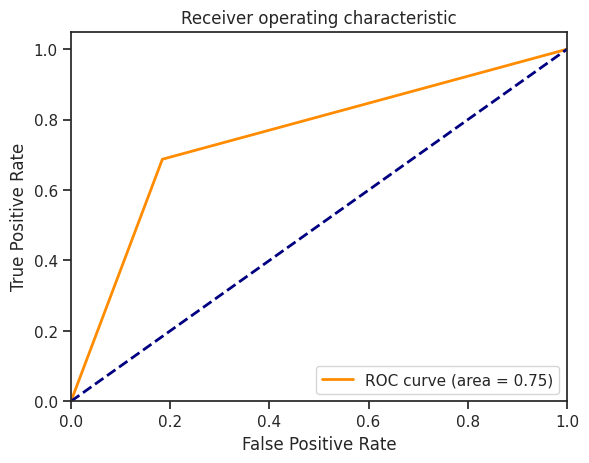

In [115]:
draw_roc_curve(bin_y_test, bin_target_i, pos_label=1, average='micro')

Сделаем тоже самое для оптимальной модели:

In [116]:
bin_clf_o = KNeighborsClassifier(n_neighbors=5)
bin_clf_o.fit(X_train, bin_y_train)
bin_clf_o.predict(X_test)

array([0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 1])

In [117]:
proba_target_o = bin_clf_o.predict_proba(X_test)
len(proba_target_o), proba_target_o

(54,
 array([[1. , 0. ],
        [1. , 0. ],
        [0.4, 0.6],
        [0.2, 0.8],
        [0.8, 0.2],
        [1. , 0. ],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.4, 0.6],
        [1. , 0. ],
        [0. , 1. ],
        [1. , 0. ],
        [0.2, 0.8],
        [1. , 0. ],
        [1. , 0. ],
        [0.2, 0.8],
        [0.6, 0.4],
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [1. , 0. ],
        [0.2, 0.8],
        [1. , 0. ],
        [0.8, 0.2],
        [0.8, 0.2],
        [0.2, 0.8],
        [0. , 1. ],
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [0.4, 0.6],
        [0.8, 0.2],
        [0.8, 0.2],
        [0.8, 0.2],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [1. , 0. ],
        [0.8, 0.2],
        [0.6, 0.4],
        [1. , 0. ],
        [0.2, 0.8],
        [1. , 0

In [118]:
true_proba_target_o = proba_target_o[:,1]
true_proba_target_o

array([0. , 0. , 0.6, 0.8, 0.2, 0. , 0.6, 0.2, 0.6, 0. , 1. , 0. , 0.8,
       0. , 0. , 0.8, 0.4, 0.2, 0. , 0. , 0.2, 0. , 0.8, 0. , 0.2, 0.2,
       0.8, 1. , 0.2, 0. , 0. , 0.2, 0. , 0. , 0.2, 0.6, 0.2, 0.2, 0.2,
       0. , 0. , 0. , 0. , 0. , 0. , 0.2, 0.4, 0. , 0.8, 0. , 0.6, 0.6,
       0.4, 1. ])

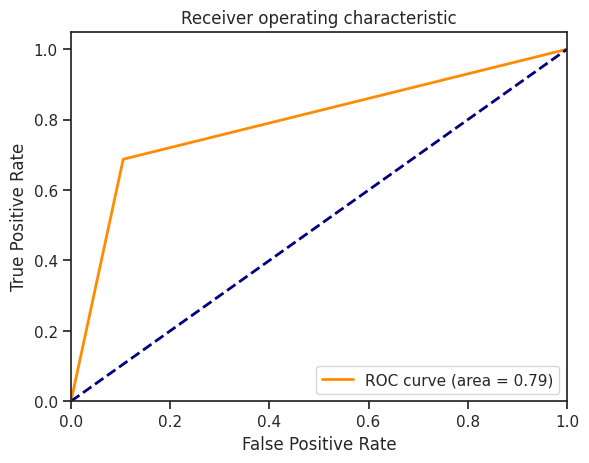

In [119]:
draw_roc_curve(bin_y_test, bin_target_o, pos_label=1, average='micro')

Видно, что у оптимальной модели выше точность, чем у исходной.